# Lab 1: Training a Neural Network from Scratch

### **neural network** is a computational model inspired by the structure of biological neural networks. It consists of layers of neurons, where:  
- **Input Layer** receives the raw data.  
- **Hidden Layers** process data through weighted connections and activation functions.  
- **Output Layer** produces the final result.  

### Architecture of a Simple Feedforward Neural Network
- **Input Layer**: Number of neurons = number of features in the dataset.  
- **Hidden Layer(s)**: Includes activation functions like ReLU or Sigmoid.  
- **Output Layer**: Number of neurons depends on the task (e.g., binary classification = 1 neuron with sigmoid).  


## 2. Data Preparation

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

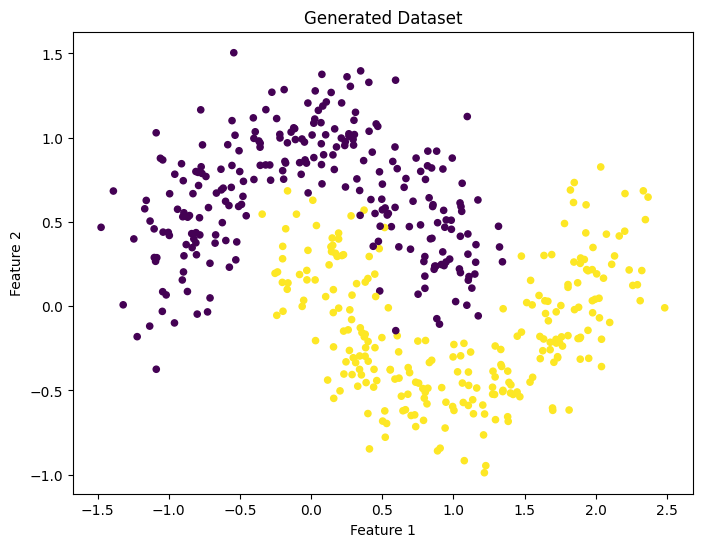

In [ ]:
# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Visualize dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', s=20)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Normalize and split data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Initialize Network Parameters

In [42]:
# Define network architecture
input_neurons = 2 
hidden_neurons = 4
output_neurons = 1

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

## 4. Forward Propagation

In [ ]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# Forward propagation for a single example
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A1, A2

# Example forward pass
A1, A2 = forward_propagation(X_train, W1, b1, W2, b2)

## 5. Loss Computation

In [ ]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]  # Number of examples
    loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Example loss computation
loss = compute_loss(y_train, A2)
print(f"Initial loss: {loss}")

Initial loss: 0.7821868175846737


## 6. Backpropagation

In [43]:
# Backpropagation
def backpropagation(X, y, A1, A2, W2):
    m = X.shape[0]  # Number of examples
    
    # Gradients for output layer
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    # Gradients for hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 > 0)  # Derivative of ReLU
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

# Example backpropagation
dW1, db1, dW2, db2 = backpropagation(X_train, y_train, A1, A2, W2)

## 7. Training Loop

In [44]:
# Training loop
def train(X, y, W1, b1, W2, b2, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward pass
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Compute loss
        loss = compute_loss(y, A2)
        
        # Backpropagation
        dW1, db1, dW2, db2 = backpropagation(X, y, A1, A2, W2)
        
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return W1, b1, W2, b2

# Train the network
epochs = 1000
learning_rate = 0.01
W1, b1, W2, b2 = train(X_train, y_train, W1, b1, W2, b2, epochs, learning_rate)


Epoch 0, Loss: 0.7821868175846737
Epoch 100, Loss: 0.6489128971135479
Epoch 200, Loss: 0.5647077839686035
Epoch 300, Loss: 0.49995934492797445
Epoch 400, Loss: 0.4462258787949124
Epoch 500, Loss: 0.40397691614429987
Epoch 600, Loss: 0.3721599147392675
Epoch 700, Loss: 0.34884091660970185
Epoch 800, Loss: 0.3325093094847227
Epoch 900, Loss: 0.3212331479181731


## 8. Evaluation

In [46]:
# Evaluate the model
def evaluate(X, y, W1, b1, W2, b2):
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = (A2 > 0.5).astype(int)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

# Test accuracy
accuracy = evaluate(X_test, y_test, W1, b1, W2, b2)
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 85.00%
